In [63]:
>>> from sklearn import datasets
>>> import numpy as np

>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,1,2,3]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [64]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)

In [65]:
>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='linear',random_state = 1)
>>> svm.fit(X_train_std, y_train)

>>> y_pred_1= svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)
>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test,y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

train accuracy: 0.97
test accuracy: 0.98
[[35  0  0]
 [ 0 32  3]
 [ 0  0 35]]
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [66]:
>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='poly',random_state = 1)
>>> svm.fit(X_train_std, y_train)

>>> y_pred_1= svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)
>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test,y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

train accuracy: 0.92
test accuracy: 0.89
[[35  0  0]
 [ 0 35  0]
 [ 0  8 27]]
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


In [67]:
>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='rbf',random_state = 1)
>>> svm.fit(X_train_std, y_train)

>>> y_pred_1= svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)
>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test,y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

train accuracy: 0.97
test accuracy: 0.98
[[35  0  0]
 [ 0 32  3]
 [ 0  0 35]]
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [68]:
>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='sigmoid',random_state = 1)
>>> svm.fit(X_train_std, y_train)

>>> y_pred_1= svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)
>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test,y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

train accuracy: 0.92
test accuracy: 0.89
[[35  0  0]
 [ 0 30  5]
 [ 0  3 32]]
[[15  0  0]
 [ 0 11  4]
 [ 0  1 14]]


In [69]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None,  
                          resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

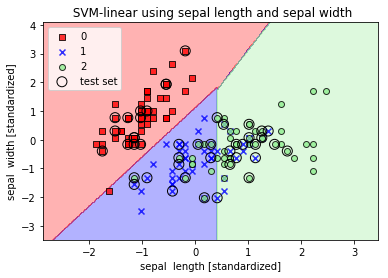

train accuracy: 0.85
test accuracy: 0.73
[[34  1  0]
 [ 0 27  8]
 [ 0  7 28]]
[[15  0  0]
 [ 0  8  7]
 [ 0  5 10]]


In [70]:
# SVM using linear kernel selecting  sepal length and sepal width in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,1]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='linear',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length [standardized]')
>>> plt.ylabel('sepal  width [standardized]')
>>> plt.title(' SVM-linear using sepal length and sepal width')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

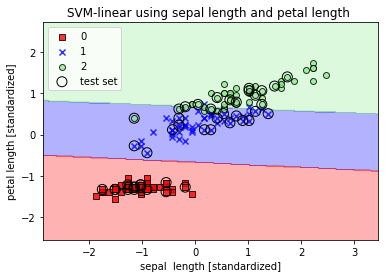

train  accuracy: 0.94
test accuracy: 0.91
[[35  0  0]
 [ 0 32  3]
 [ 0  3 32]]
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


In [71]:
# SVM using linear kernel selecting  sepal length and petal length  in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,2]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='linear',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length [standardized]')
>>> plt.ylabel('petal length [standardized]')
>>> plt.title('SVM-linear using sepal length and petal length ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train  accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

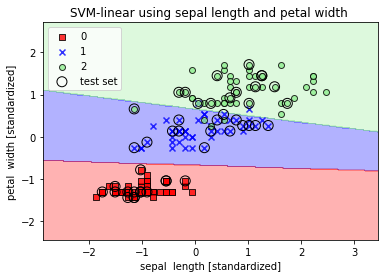

train accuracy: 0.95
test accuracy: 0.98
[[35  0  0]
 [ 0 33  2]
 [ 0  3 32]]
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [72]:
# SVM using linear kernel selecting  sepal length and petal width  in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='linear',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length [standardized]')
>>> plt.ylabel('petal  width [standardized]')
>>> plt.title('SVM-linear using sepal length and petal width ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

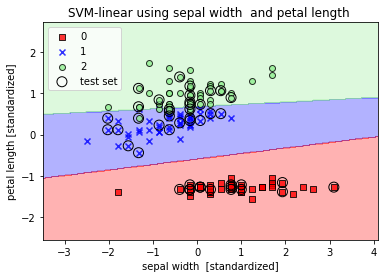

train accuracy: 0.94
test accuracy: 0.93
[[35  0  0]
 [ 0 32  3]
 [ 0  3 32]]
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


In [73]:
# SVM using linear kernel selecting  sepal width and petal length  in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1,2]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='linear',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal width  [standardized]')
>>> plt.ylabel('petal length [standardized]')
>>> plt.title('SVM-linear using sepal width  and petal length ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

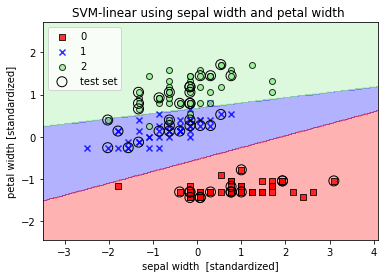

train accuracy: 0.94
test accuracy: 1.00
[[35  0  0]
 [ 0 33  2]
 [ 0  4 31]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [74]:
# SVM using linear kernel selecting  sepal width and petal width in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='linear',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal width  [standardized]')
>>> plt.ylabel('petal width [standardized]')
>>> plt.title('SVM-linear using sepal width and petal width ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

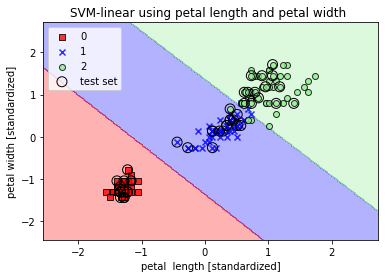

train accuracy: 0.95
test accuracy: 0.98
[[35  0  0]
 [ 0 32  3]
 [ 0  2 33]]
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [75]:
# SVM using linear kernel selecting  petal length and petal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [2,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='linear',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('petal  length [standardized]')
>>> plt.ylabel('petal width [standardized]')
>>> plt.title('SVM-linear using petal length and petal width ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

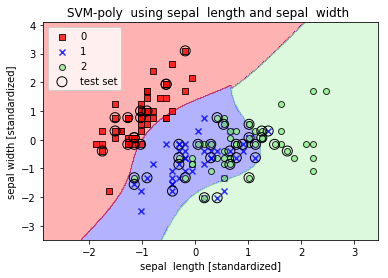

train accuracy: 0.76
test accuracy: 0.71
[[33  2  0]
 [ 0 33  2]
 [ 0 21 14]]
[[14  1  0]
 [ 0 12  3]
 [ 0  9  6]]


In [76]:
# SVM using poly kernel selecting  sepal  length and sepal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,1]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='poly',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length [standardized]')
>>> plt.ylabel('sepal width [standardized]')
>>> plt.title('SVM-poly  using sepal  length and sepal  width ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

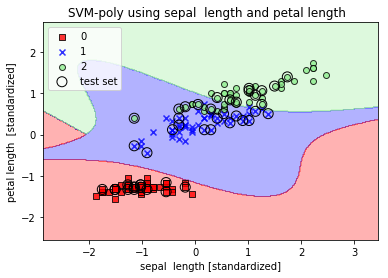

train accuracy: 0.90
test accuracy: 0.89
[[35  0  0]
 [ 0 33  2]
 [ 0  9 26]]
[[15  0  0]
 [ 0 15  0]
 [ 0  5 10]]


In [77]:
# SVM using poly kernel selecting  sepal  length and petal  length  in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,2]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='poly',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length [standardized]')
>>> plt.ylabel('petal length  [standardized]')
>>> plt.title('SVM-poly using sepal  length and petal length  ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

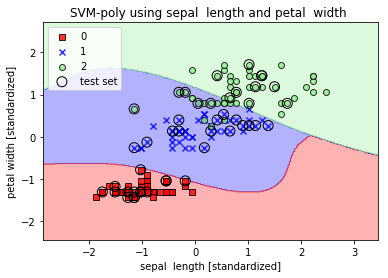

train accuracy: 0.90
test accuracy: 0.89
[[35  0  0]
 [ 0 34  1]
 [ 0 10 25]]
[[15  0  0]
 [ 0 15  0]
 [ 0  5 10]]


In [78]:
# SVM using poly kernel selecting  sepal  length and petal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='poly',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length [standardized]')
>>> plt.ylabel('petal width [standardized]')
>>> plt.title('SVM-poly using sepal  length and petal  width ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

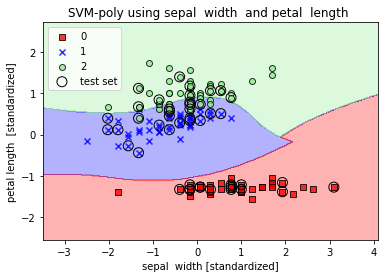

train  accuracy: 0.90
test accuracy: 0.87
[[35  0  0]
 [ 0 33  2]
 [ 0  9 26]]
[[15  0  0]
 [ 0 15  0]
 [ 0  6  9]]


In [79]:
# SVM using poly kernel selecting  sepal  width  and petal length  in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1,2]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='poly',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  width [standardized]')
>>> plt.ylabel('petal length  [standardized]')
>>> plt.title('SVM-poly using sepal  width  and petal  length ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train  accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

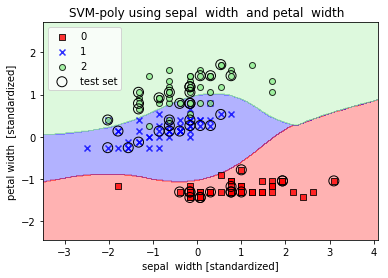

train  accuracy: 0.92
test accuracy: 0.91
[[35  0  0]
 [ 0 35  0]
 [ 0  8 27]]
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [80]:
# SVM using poly kernel selecting  sepal  width  and petal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='poly',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  width [standardized]')
>>> plt.ylabel('petal width  [standardized]')
>>> plt.title('SVM-poly using sepal  width  and petal  width  ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train  accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

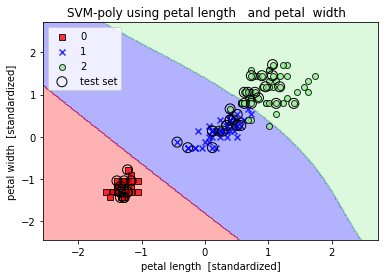

train  accuracy: 0.94
test accuracy: 0.96
[[35  0  0]
 [ 0 35  0]
 [ 0  6 29]]
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


In [81]:
# SVM using poly kernel selecting  petal length  and petal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [2,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='poly',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('petal length  [standardized]')
>>> plt.ylabel('petal width  [standardized]')
>>> plt.title('SVM-poly using petal length   and petal  width  ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train  accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

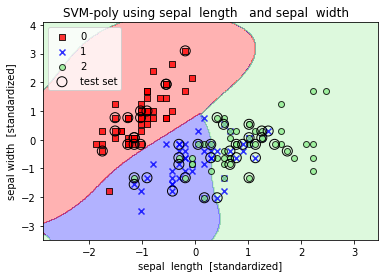

train accuracy: 0.85
test accuracy: 0.71
[[34  1  0]
 [ 0 26  9]
 [ 0  6 29]]
[[15  0  0]
 [ 0  7  8]
 [ 0  5 10]]


In [82]:
# SVM using rbf kernel selecting  sepal length  and sepal  width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,1]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='rbf',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length  [standardized]')
>>> plt.ylabel('sepal width  [standardized]')
>>> plt.title('SVM-poly using sepal  length   and sepal  width  ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

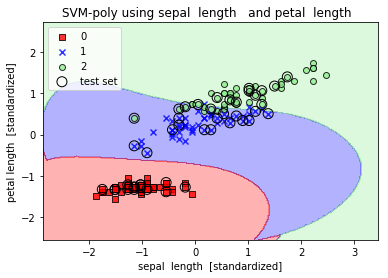

train accuracy: 0.90
test accuracy: 0.91
[[35  0  0]
 [ 0 32  3]
 [ 0  7 28]]
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


In [83]:
# SVM using rbf kernel selecting  sepal length  and petal length   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,2]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='rbf',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length  [standardized]')
>>> plt.ylabel('petal length  [standardized]')
>>> plt.title('SVM-poly using sepal  length   and petal  length  ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

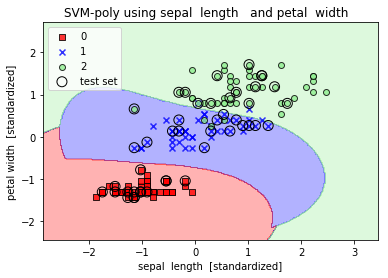

train accuracy: 0.95
test accuracy: 0.98
[[35  0  0]
 [ 0 33  2]
 [ 0  3 32]]
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [84]:
# SVM using rbf kernel selecting  sepal length  and petal width    in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='rbf',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length  [standardized]')
>>> plt.ylabel('petal width  [standardized]')
>>> plt.title('SVM-poly using sepal  length   and petal  width  ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

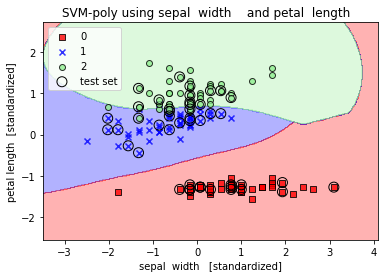

train accuracy: 0.95
test accuracy: 0.93
[[35  0  0]
 [ 0 34  1]
 [ 0  4 31]]
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


In [85]:
# SVM using rbf kernel selecting  sepal width  and petal length   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1,2]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='rbf',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  width   [standardized]')
>>> plt.ylabel('petal length  [standardized]')
>>> plt.title('SVM-poly using sepal  width    and petal  length  ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

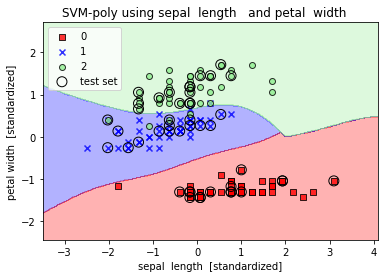

train accuracy: 0.94
test accuracy: 1.00
[[35  0  0]
 [ 0 33  2]
 [ 0  4 31]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [86]:
# SVM using rbf kernel selecting  sepal length  and petal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='rbf',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  length  [standardized]')
>>> plt.ylabel('petal width  [standardized]')
>>> plt.title('SVM-poly using sepal  length   and petal  width   ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

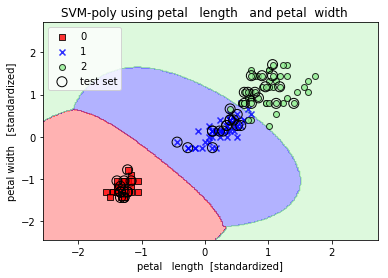

train accuracy: 0.96
test accuracy: 0.98
[[35  0  0]
 [ 0 33  2]
 [ 0  2 33]]
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [87]:
# SVM using rbf kernel selecting petal length   and petal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [2,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='rbf',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('petal   length  [standardized]')
>>> plt.ylabel('petal width   [standardized]')
>>> plt.title('SVM-poly using petal   length   and petal  width   ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

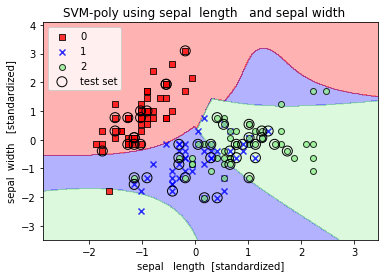

train accuracy: 0.79
test accuracy: 0.76
[[34  0  1]
 [ 0 26  9]
 [ 0 12 23]]
[[15  0  0]
 [ 0  8  7]
 [ 0  4 11]]


In [88]:
# SVM using sigmoid kernel selecting sepal length   and sepal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,1]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='sigmoid',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal   length  [standardized]')
>>> plt.ylabel('sepal  width   [standardized]')
>>> plt.title('SVM-poly using sepal  length   and sepal width   ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

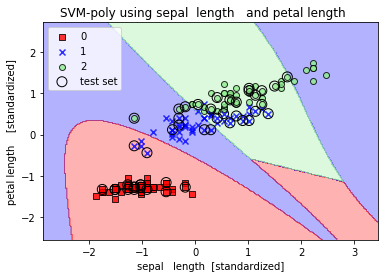

train  accuracy: 0.79
test accuracy: 0.71
[[35  0  0]
 [ 2 20 13]
 [ 0  7 28]]
[[15  0  0]
 [ 2  5  8]
 [ 0  3 12]]


In [89]:
# SVM using sigmoid kernel selecting sepal length   and petal length  in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,2]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='sigmoid',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal   length  [standardized]')
>>> plt.ylabel('petal length    [standardized]')
>>> plt.title('SVM-poly using sepal  length   and petal length    ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train  accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

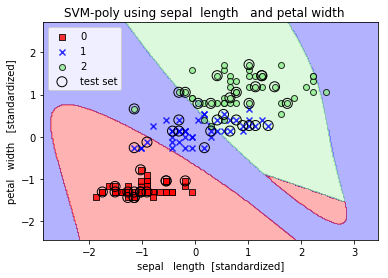

train accuracy: 0.86
test accuracy: 0.73
[[35  0  0]
 [ 2 23 10]
 [ 0  3 32]]
[[15  0  0]
 [ 2  5  8]
 [ 0  2 13]]


In [90]:
# SVM using sigmoid kernel selecting sepal length   and petal  width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='sigmoid',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal   length  [standardized]')
>>> plt.ylabel('petal   width   [standardized]')
>>> plt.title('SVM-poly using sepal  length   and petal width   ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

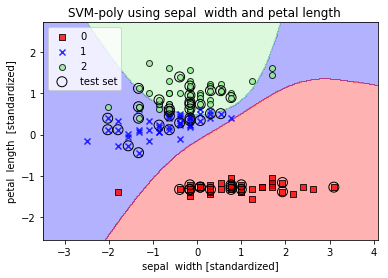

train accuracy: 0.88
test accuracy: 0.96
[[34  1  0]
 [ 0 31  4]
 [ 0  8 27]]
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


In [91]:
# SVM using sigmoid kernel selecting sepal width  and petal length    in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1,2]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='sigmoid',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  width [standardized]')
>>> plt.ylabel('petal  length  [standardized]')
>>> plt.title('SVM-poly using sepal  width and petal length   ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

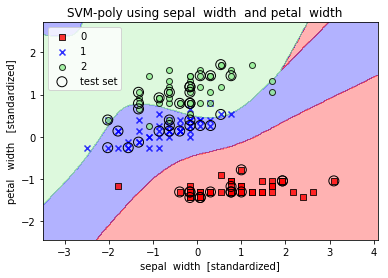

train accuracy: 0.92
test accuracy: 0.93
[[34  1  0]
 [ 0 32  3]
 [ 0  4 31]]
[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


In [92]:
# SVM using sigmoid kernel selecting sepal width and petal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='sigmoid',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal  width  [standardized]')
>>> plt.ylabel('petal   width   [standardized]')
>>> plt.title('SVM-poly using sepal  width  and petal  width   ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

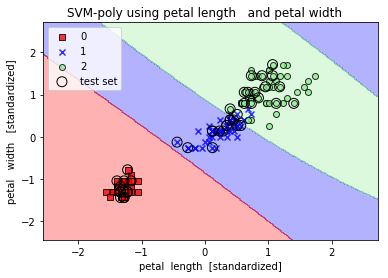

train accuracy: 0.93
test accuracy: 0.98
[[35  0  0]
 [ 0 28  7]
 [ 0  0 35]]
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [93]:
# SVM using sigmoid kernel selecting petal  length   and petal width   in iris data
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [2,3]]
>>> y = iris.target

>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))

>>> from sklearn.svm import SVC
>>> svm = SVC(kernel='sigmoid',random_state=1)
>>> svm.fit(X_train_std,y_train)
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=svm, 
...                       test_idx=range(105, 150))
>>> plt.xlabel('petal  length  [standardized]')
>>> plt.ylabel('petal   width   [standardized]')
>>> plt.title('SVM-poly using petal length   and petal width   ')
>>> plt.legend(loc='upper left')
>>> plt.show()

>>> y_pred_1 = svm.predict(X_train_std)
>>> y_pred_2 = svm.predict(X_test_std)

>>> from sklearn.metrics import accuracy_score
>>> print('train accuracy: %.2f' % accuracy_score(y_train, y_pred_1))
>>> print('test accuracy: %.2f' % accuracy_score(y_test, y_pred_2))

>>> from sklearn.metrics import confusion_matrix 
>>> CM_1 = confusion_matrix(y_train,y_pred_1)
>>> print(CM_1)
>>> CM_2 = confusion_matrix(y_test,y_pred_2)
>>> print(CM_2)

# comparision of kernels using 4 features:
 
 we get the best possible classification when we use linear and rbf kernels while dealing with all features when compared to the poly and sigmoid kernels. this can be seen by comparing the accuracies of training and testing data respectively. 
 
# Pros and cons of Linear kernel using 2 features at a time :
 
 when the data is linearly separable, this kernel classifies the training and testing samples correctly with accuracies in the range of 91 to 98. However, in the linearly inseparable case, it classifies the training data well but fails to classify the test data accurately.
 
# Pros and cons of poly kernel using 2 features at a time:

when the data is linearly separable, this kernel classifies the training data accurately but fails to classify the testing data accurately. in case of linearly inseparable case also it follows the same property but less accurate when compared to the linear kernel

# Pros and cons of rgb kernel using 2 features at a time :

This kernel is almost similar to the linear one in terms of classification of data both in cases of linearly separable and inseparable with minor accuracy changes.

# Pros and cons of sigmoid kernel using 2 features at a time:

This kernel also classifies the training samples in case of linearly separable and inseparable effectively.However, it fails to classify the testing samples in linearly inseparable case. also, the accuracies are much less when compared to that of linear and rgb.
